In [1]:
from shapely import Point , LineString , LinearRing , Polygon , MultiPoint , MultiLineString , MultiPolygon

# object.boundary

### 按集合论，返回一个代表该对象边界的更低一维的几何对象。

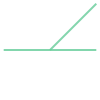

In [2]:
coords = [((0, 0), (1, 1)), ((-1, 0), (1, 0))]
lines = MultiLineString(coords)
lines

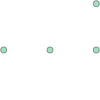

In [3]:
lines.boundary

In [4]:
list(lines.boundary.geoms)

[<POINT (-1 0)>, <POINT (0 0)>, <POINT (1 0)>, <POINT (1 1)>]

In [5]:
print(lines.boundary.boundary)

GEOMETRYCOLLECTION EMPTY


# object.centroid

### 返回几何对象的几何中心点，即质心。

In [6]:
line = LineString([(0, 0.5), (1, 1.5)])
print(line.centroid)

POINT (0.5 1)


In [7]:
polygon = Polygon([(0, 0), (1, 1), (1, 0)])
print(polygon.centroid)

POINT (0.6666666666666666 0.3333333333333333)


<AxesSubplot:>

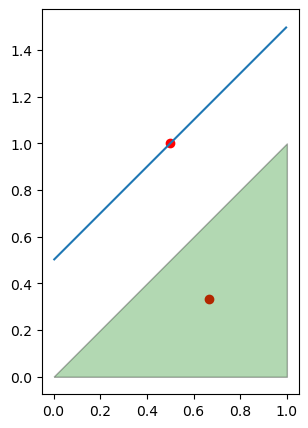

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

f , ax = plt.subplots(figsize=(5,5))

ax.scatter(line.centroid.x , line.centroid.y , color="red" , marker="o")
gpd.GeoDataFrame([line] , columns=["geometry"]).plot(ax=ax)

ax.scatter(polygon.centroid.x , polygon.centroid.y , color="red" , marker="o")
gpd.GeoDataFrame([polygon] , columns=["geometry"]).plot(ax=ax , facecolor="green" ,edgecolor='k' , alpha=0.3)

# object.difference(other)

### 返回构成该几何对象的且不构成另一个对象的点的集合。即，相减操作。

In [9]:
# buffer()为缓冲区操作
a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)

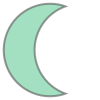

In [10]:
result = a.difference(b)
result

<AxesSubplot:>

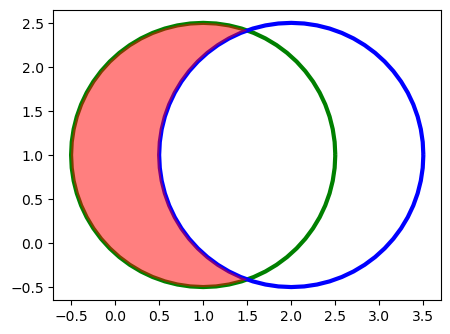

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

f , ax = plt.subplots(figsize=(5,5))

gpd.GeoDataFrame([a] , columns=["geometry"]).plot(ax=ax , facecolor="none" , edgecolor="green" , linewidth=3)
gpd.GeoDataFrame([b] , columns=["geometry"]).plot(ax=ax , facecolor="none" , edgecolor="blue" , linewidth=3)
gpd.GeoDataFrame([result] , columns=["geometry"]).plot(ax=ax , alpha=0.5 , facecolor="red")

# object.intersection(other)

### 返回该对象与另一个几何对象的交集。即，相交操作。

In [12]:
a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)

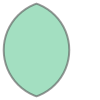

In [13]:
result = a.intersection(b)
result

<AxesSubplot:>

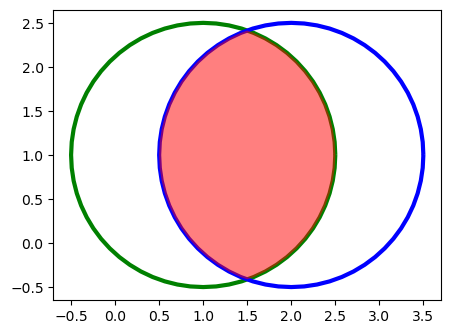

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt

f , ax = plt.subplots(figsize=(5,5))

gpd.GeoDataFrame([a] , columns=["geometry"]).plot(ax=ax , facecolor="none" , edgecolor="green" , linewidth=3)
gpd.GeoDataFrame([b] , columns=["geometry"]).plot(ax=ax , facecolor="none" , edgecolor="blue" , linewidth=3)
gpd.GeoDataFrame([result] , columns=["geometry"]).plot(ax=ax , alpha=0.5 , facecolor="red")

# object.symmetric_difference(other)

### 返回这个对象中不在另一个几何对象中的点的表示，以及另一个对象中不在这个几何对象中的点的表示。即，对称差操作。

In [15]:
a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)

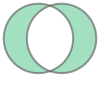

In [16]:
result = a.symmetric_difference(b)
result

<AxesSubplot:>

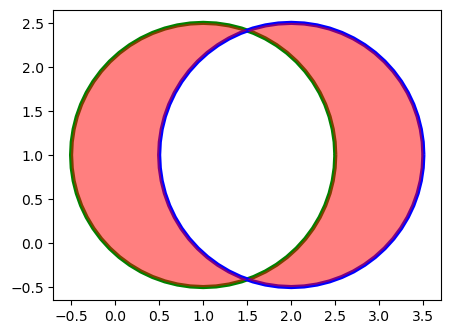

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt

f , ax = plt.subplots(figsize=(5,5))

gpd.GeoDataFrame([a] , columns=["geometry"]).plot(ax=ax , facecolor="none" , edgecolor="green" , linewidth=3)
gpd.GeoDataFrame([b] , columns=["geometry"]).plot(ax=ax , facecolor="none" , edgecolor="blue" , linewidth=3)
gpd.GeoDataFrame([result] , columns=["geometry"]).plot(ax=ax , alpha=0.5 , facecolor="red")

# object.union(other)

### 返回该对象和另一个几何对象的点集的合集。即，合并操作。

In [18]:
a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)

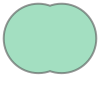

In [19]:
result = a.union(b)
result

<AxesSubplot:>

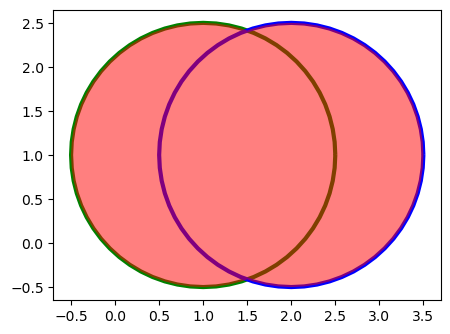

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt

f , ax = plt.subplots(figsize=(5,5))

gpd.GeoDataFrame([a] , columns=["geometry"]).plot(ax=ax , facecolor="none" , edgecolor="green" , linewidth=3)
gpd.GeoDataFrame([b] , columns=["geometry"]).plot(ax=ax , facecolor="none" , edgecolor="blue" , linewidth=3)
gpd.GeoDataFrame([result] , columns=["geometry"]).plot(ax=ax , alpha=0.5 , facecolor="red")

### 合并操作的语义因几何对象的类型而异。例如，比较多边形合并之后的边界和它们的边界的合并结果。

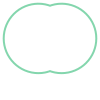

In [21]:
a.union(b).boundary

In [22]:
a.union(b).boundary.geom_type

'LineString'

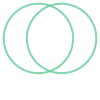

In [23]:
a.boundary.union(b.boundary)

In [24]:
a.boundary.union(b.boundary).geom_type

'MultiLineString'

# 上述集合论的方法中有几个可以通过运算符来调用。

In [25]:
from shapely import wkt

p1 = wkt.loads('POLYGON((0 0,1 0,1 1,0 1,0 0))')
p2 = wkt.loads('POLYGON((0.5 0, 1.5 0, 1.5 1, 0.5 1, 0.5 0))')

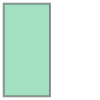

In [26]:
# intersection 
p1 & p2

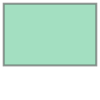

In [27]:
# union 
p1 | p2

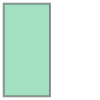

In [28]:
# difference 
p1 - p2

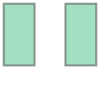

In [29]:
# symmetric_difference 
p1 ^ p2

<AxesSubplot:>

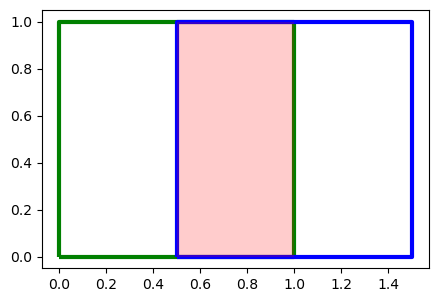

In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt

f , ax = plt.subplots(figsize=(5,5))

gpd.GeoDataFrame([p1] , columns=["geometry"]).plot(ax=ax , facecolor="none" , edgecolor="green" , linewidth=3)
gpd.GeoDataFrame([p2] , columns=["geometry"]).plot(ax=ax , facecolor="none" , edgecolor="blue" , linewidth=3)
gpd.GeoDataFrame([p1 & p2] , columns=["geometry"]).plot(ax=ax , alpha=0.2 , facecolor="red")